# BBC

In [3]:
# Import library
import glob

# The books files are contained in this folder
folder = "News Articles/politics/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder+"*.txt")
# ... YOUR CODE FOR TASK 1 ...
files.sort()

In [100]:
# Import libraries
import re, os
from itertools import islice
# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n)
    t = f.read()

    # Remove all non-alpha-numeric characters
    re.sub('[\W_]+', '', t)
    
    # titles.append(f.readlines()[:15])
    match = re.search("\n",t)
    titles.append(t[:match.start()])
    
    # Store the texts and titles of the books in two separate lists
    txts.append(t[match.end()+1:])
    
    f.close()

print(len(txts))

417


In [103]:
print(titles[51], "\n\n", txts[51][:100])

Nuclear strike 'key terror risk' 

 The UK and US must realise they cannot prevent all terror attacks and should focus on making sure th


In [106]:
from nltk.corpus import stopwords
# print(stopwords.words('english'))
english_stops = set(stopwords.words('english'))

# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [content.lower() for content in txts]

# Transform the text into tokens 
txts_split = [item.split() for item in txts_lower_case]

text_stop = [[word for word in item if word not in english_stops] for item in txts_split]
# Remove tokens which are part of the list of stop words
texts = [[word for word in item if word not in stoplist] for item in text_stop]

# Print the first 20 tokens for the "On the Origin of Species" book
# print(texts[15][:20])

In [107]:
print(texts[51][:10])

['uk', 'us', 'must', 'realise', 'cannot', 'prevent', 'terror', 'attacks', 'focus', 'making']


In [108]:
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer

# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Stem the words from filtered and store in stemmed_words
stemmed_words = [[stemmer.stem(word) for word in item if word.isalpha()] for item in texts]
stemmed_words[51][:10]
# Print the stemmed_words to observe words after stemming
# print("After stemming:   ", stemmed_words)

['uk',
 'us',
 'must',
 'realis',
 'cannot',
 'prevent',
 'terror',
 'attack',
 'focus',
 'make']

In [110]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(stemmed_words)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(item) for item in stemmed_words]

# Print the first five elements of the On the Origin of species' BoW model
print(bows[51][:10])

[(4, 1), (8, 1), (50, 1), (54, 1), (59, 1), (62, 1), (63, 1), (65, 1), (71, 2), (99, 2)]


In [111]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame(bows[15])

# Add the column names to the DataFrame
df_bow_origin.columns = ["index", "occurrences"]

# Add a column containing the token corresponding to the dictionary index
df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin = df_bow_origin.sort_values(by = 'occurrences', ascending=False)
df_bow_origin.head(10)

,index,occurrences,token
61,1112,8,social
9,136,6,committe
59,1110,6,shortag
20,303,5,scienc
28,472,3,skill
19,297,3,research
11,163,3,key
13,202,2,subject
25,425,2,econom
24,366,2,nation


In [112]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)


In [114]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[51]])

# Name the columns of the DataFrame id and score
df_tfidf.columns = ["id","score"]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf["token"] = [dictionary[i] for i in df_tfidf["id"]]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf = df_tfidf.sort_values(by="score", ascending = False)
df_tfidf.head(10)

,id,score,token
137,2291,0.618495,nuclear
126,2280,0.257399,etzioni
151,2305,0.171599,uranium
127,2281,0.171599,fissil
89,1516,0.168680,materi
145,2299,0.151884,rogu
108,1946,0.144805,terrorist
107,1906,0.140351,russia
61,707,0.140351,prof
133,2287,0.096536,influenc


In [137]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame.from_records(list(sims))

short_title = list()
l = [item.split(' ') for item in titles]
short_title = [a[0] for a in l]


# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titles
sim_df.index = titles
# Print the resulting matrix
sim_df[50:53]

,Labour plans maternity pay rise,Watchdog probes e-mail deletions,Hewitt decries 'career sexism',Labour chooses Manchester,Brown ally rejects Budget spree,'Errors' doomed first Dome sale,Fox attacks Blair's Tory 'lies',Women MPs reveal sexist taunts,Campbell: E-mail row 'silly fuss',Crucial decision on super-casinos,...,Howard hits back at mongrel jibe,Tories urge 'change at the top',Sayeed to stand down as Tory MP,Howard's unfinished business,'Last chance' warning for voters,Sainsbury's Labour election gift,Blair 'up for it' ahead of poll,Labour MP praises Tory campaign,Top Tories on Lib Dem 'hit list',Lib Dems unveil election slogan
MPs criticise child access system,0.044224,0.057822,0.020759,0.008667,0.013915,0.031905,0.032294,0.028800,0.022433,0.036247,...,0.058981,0.014134,0.025751,0.032480,0.017167,0.016578,0.045764,0.017364,0.032668,0.038901
Nuclear strike 'key terror risk',0.009371,0.027068,0.019102,0.013655,0.027927,0.025283,0.023899,0.034080,0.022098,0.010477,...,0.023076,0.040999,0.004930,0.031400,0.023674,0.011313,0.043806,0.019204,0.026595,0.023833
Russian ex-spy on hunger strike,0.024839,0.041193,0.013458,0.012431,0.027410,0.024253,0.037944,0.020635,0.052997,0.016295,...,0.053357,0.040552,0.012806,0.028525,0.035413,0.016872,0.043077,0.010264,0.013666,0.026366


Text(0.5, 1.0, 'Similar Books to Origin of the Species')

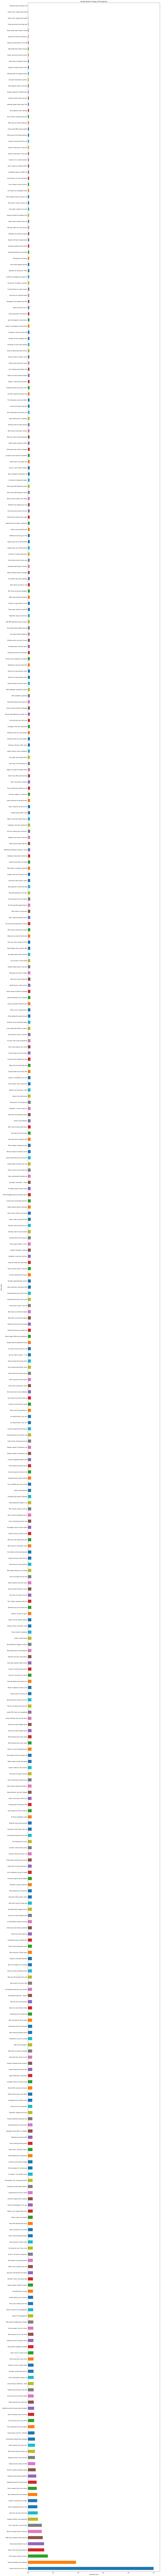

In [140]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df["Nuclear strike 'key terror risk'"]
# Sort by ascending scores
# v_sorted = sorted(v, reverse=True)
v_sorted = v.sort_values(ascending = False)
# index = [v_sorted.index[i] for i in range(15)]
# lab = [titles[i] for i in index]
# print(lab)
# v_sorted.rename(lambda x: titles[x])
# # Plot this data has a horizontal bar plot
# v_sorted = pd.DataFrame(v_sorted, index = lab)
plt.figure(figsize=(20,400))
v_sorted.plot.barh()
# # Modify the axes labels and plot title for a better readability

plt.xlabel('Similarity Score')
plt.ylabel('Book Index')
plt.title('Similar Books to Origin of the Species')

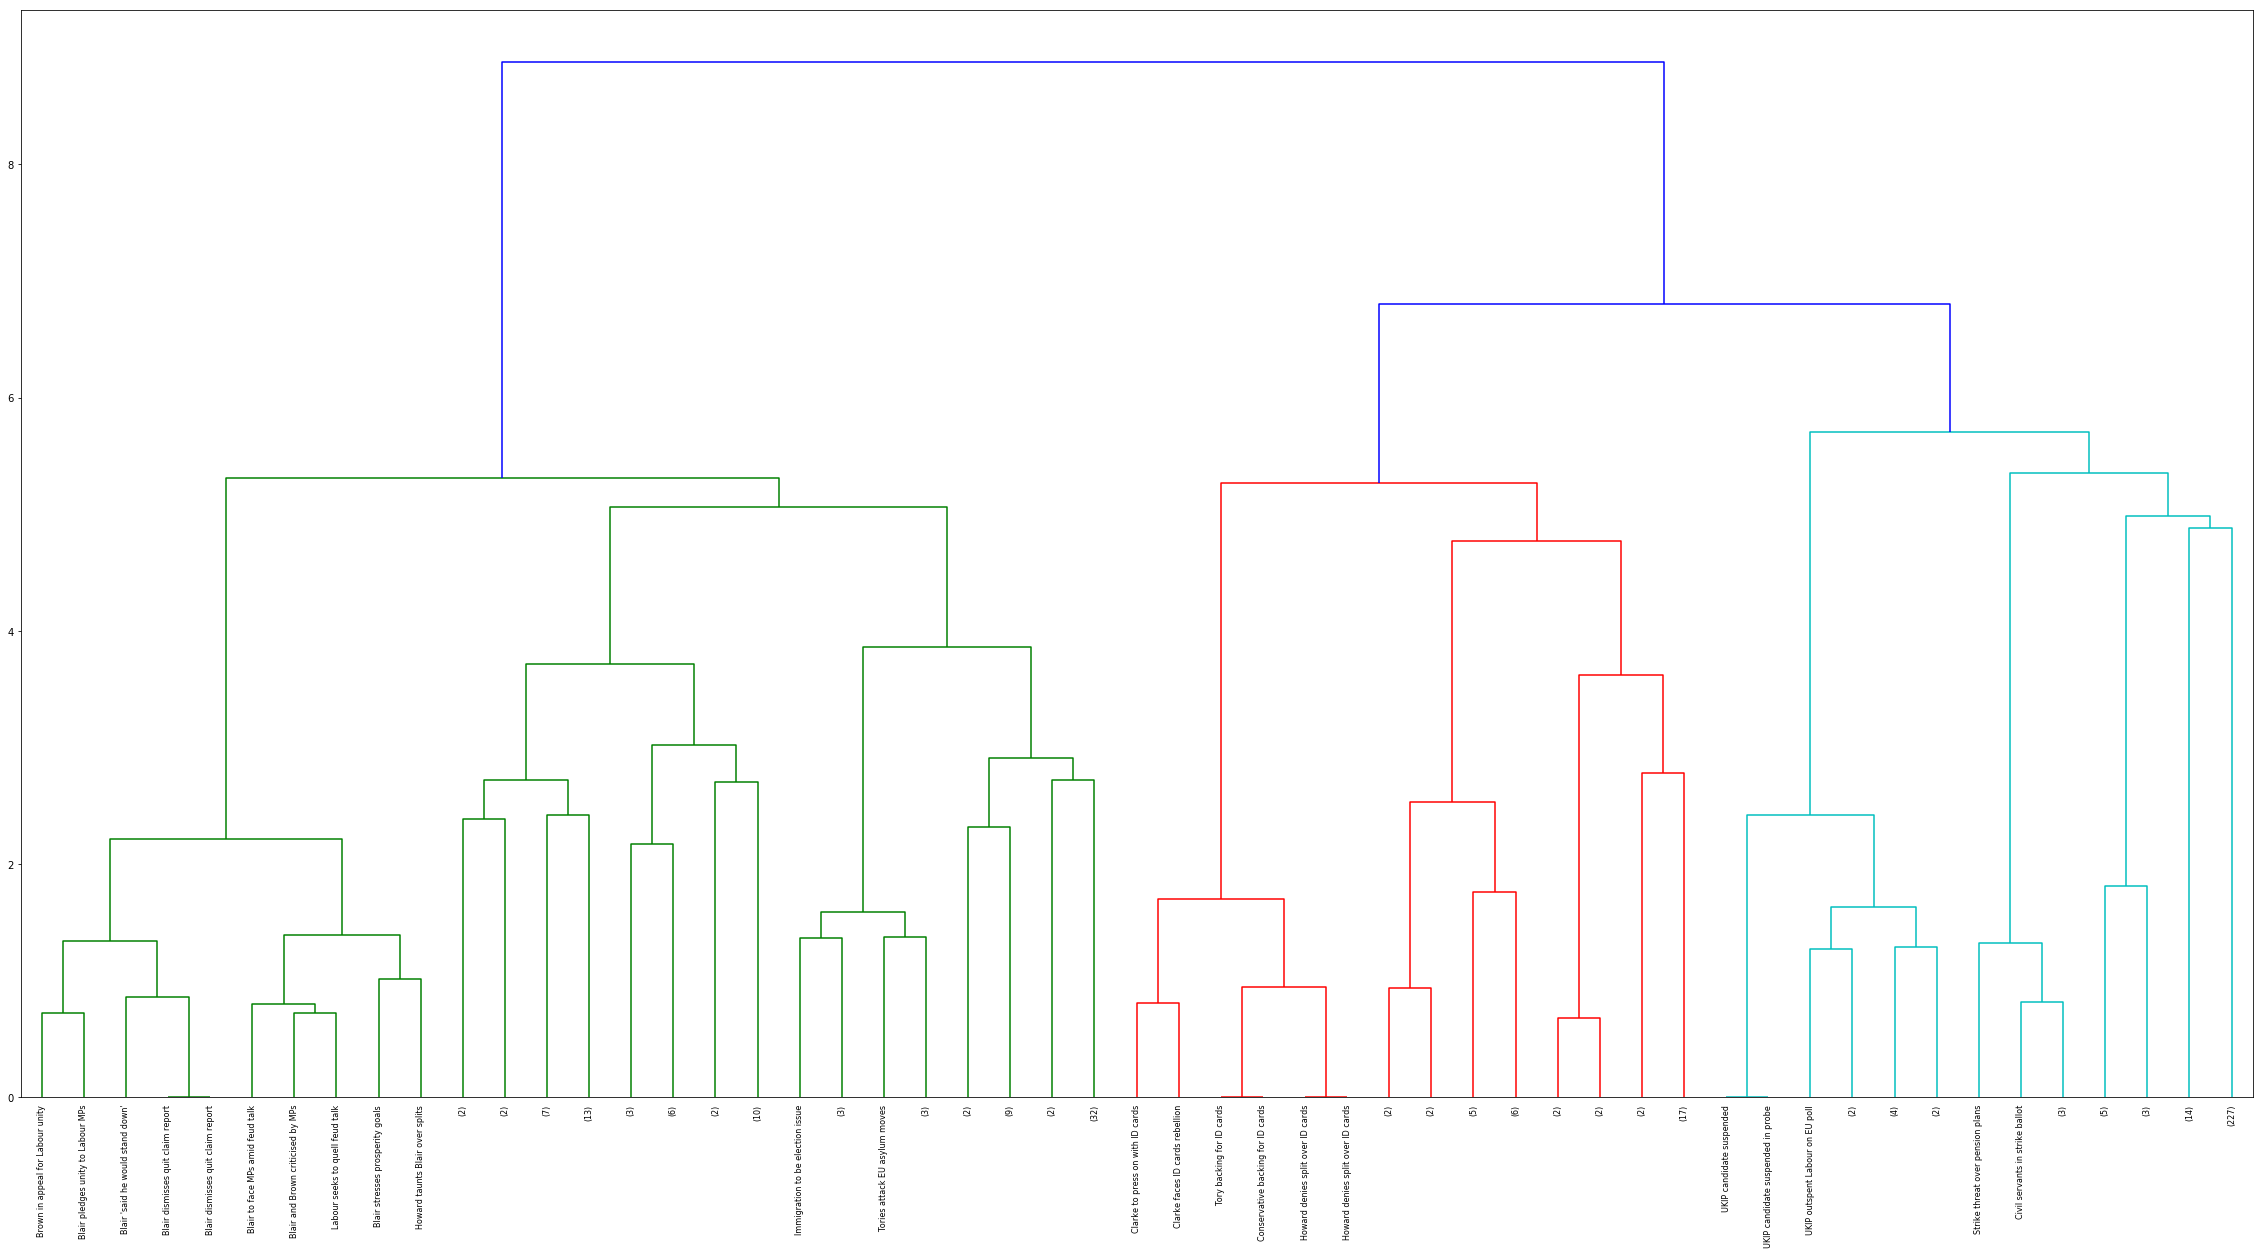

In [150]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, method='ward')

fig, axes = plt.subplots(1, 1, figsize=(40, 20))
# Display this result as a horizontal dendrogram
a = hierarchy.dendrogram(Z, p=5, leaf_font_size=8, labels = titles, truncate_mode='level')